<a href="https://colab.research.google.com/github/FelipeVillegasH/Tareas_coding_dojo/blob/main/Graphics_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Recreate Graphics
#By Felipe Villegas
###Created: 13.01.2022
Description: use of matplotlib.pyplot, filters and .loc to graphic specific filtered data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/tareas/core/Semana 3 Graphics/mortgages.csv')

In [5]:
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [7]:
# Remane of columns with the dictionary method so we can have more pythoic names to work with 
df=df.rename(columns={
    'Starting Balance':'Starting_Balance',
    'Interest Paid':'Interest_Paid',
    'Principal Paid':'Principal_Paid',
    'New Balance':'New_Balance',
    'Mortgage Name':'Mortgage_Name',
    'Interest Rate':'Interest_Rate',
})

In [11]:
# create filters on each column to be used
Ir3=df['Interest_Rate']==0.03
Ir5=df['Interest_Rate']==0.05
ItP=df['Interest_Paid']
Year=df['Mortgage_Name']=='30 Year'
Year

0        True
1        True
2        True
3        True
4        True
        ...  
1075    False
1076    False
1077    False
1078    False
1079    False
Name: Mortgage_Name, Length: 1080, dtype: bool

In [15]:
# loc the filters in new variables with the .loc method 
filter3=df.loc[Year&Ir3,:]
filter5=df.loc[Year&Ir5,:]

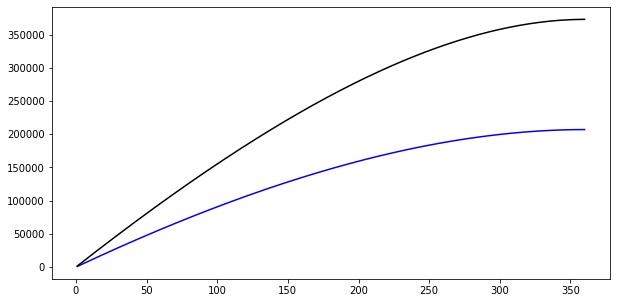

In [22]:
# define the figure size 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
# graphic each filtered variables
plt.plot(filter3['Month'],filter3['Interest_Paid'].cumsum(),c='b');
plt.plot(filter5['Month'],filter5['Interest_Paid'].cumsum(),c='k');